## Mächtigkeit der aktiven Schicht von Permafrost

> Bestimmung des Zusammenhanges zwischen der mittleren sommerlichen Temperatur und der Mächtigkeit der aktiven Schicht von Permafrost
> 
> author: Viktoriia Maksimova (v.maksimova@campus.tu-berlin.de)
> 
> date: 26.08.2024


### Einführung

"Als <b>Permafrost</b> bezeichnet man Boden oder Sediment, dessen Temperatur mindestens zwei Jahre in Folge bei oder unter 0°C liegt und somit dauerhaft gefroren ist" (Umweltbundesamt, 2006). Nach Angaben U.S. Arctic Research Commission, besetzen die Permafrost Regionen ungefähr 24% der ländlichen Oberfläche in nördlichen Hemisphäre. In diese Arbeit geht es um die Mächtigkeit der aktiven Schicht von Permafrost (<i>active layer thickness </i>). Unter diesem Begriff versteht man der Teil des Permafrostes, der saisonalen Tau-Gefrier-Vorgängen unterliegt, wenn im Sommer der Gefrierpunkt überschritten wird. Diese Auftauschicht ist gut erkennbar in Bild (© Permafrost Task Force Report).


![ALT.JPG](ALT.JPG)

*figure: U.S. Arctic Research Commission Permafrost Task Force (2003) Climate Change, Permafrost, and Impacts on Civil Infrastructure. Special Report 01-03, U.S. Arctic Research Commission, Arlington, Virginia*


Die Entstehung des Permafrostes und seine Mächtigkeit von dem Faktor Klima abhängig. Deswegen gewinnt der Permafrost letzte Zeit in Fokus als Opfer und Beschleuniger der Klimawandel (Permafrost Task Force Report, 2003). Erhöhung der mittleren annualen Temperaturen ist in polar Regionen besonders markant (in Forest-Tundra und nördliche Taiga Velgleich 10-jährigen Perioden seit 1970-e zeigt Steigerung auf 3.0°C, Melnikov, 2004). Eine der Folgen des schnellen Auftauens des Permafrostes ist die Bildung der Trockenrissen in regelmäßigen Mustern – Karsten (Liljedahl et al, 2016). Das führt zu Landnutzungsänderung in Gebieten, wo trotz Vorkommen von Permafrost in Boden große infrastrukturelle Projekte stattfinden. Dabei in Permafrostböden sind gewaltige Kohlenstoffvorräte eingelagert (Horwath, 2005), was nach Auftauen des Eises freigesetzt werden können.

Das alles spricht dazu, dass die Veränderungen in Mächtigkeit des Permafrostes und der Auftauschicht als die erste Stufe davon in wissenschaftlichen Projekten aus Bereich der Umweltmodellierung, Umweltplanung einen richtigen Platz nehmen sollen.

Meine persönliche Interesse ist mit dem Thema verbunden damit, dass ich bin selbst in Polarregion geboren bin, in Ussinsk, wo 1994 eine große Umweltkatastrophe mit riesigen Erdölverschmutzung stattgefunden. Es ist unklar, wie viel toxische Stoffe im gefrorenen Boden gebunden sind, und was bei starkem Ausschmelzen des Permafrostes (weil alle moorigen Gebiete bis zu polaren Seen und Arktischen Ozean gut vernetzt sind) passieren kann.

Ziel dieser Arbeit ist <i>lato sensu</i> eine Einstieg in die Thematik der Modellierung der durch den Klimawandel hervorrufenden künftigen Veränderungen in Landschaften mit Permafrost zu machen. Konkret geht es um die Frage, ob mit Hilfe eines Parameters, der mittleren Sommertemperatur, die zu erwartende Vertiefung der Auftauschicht vorhergesagt werden kann. Unsere Hypothese ist, dass eine starke Korrelation zwischen den beiden Variablen besteht.



![Modellierung.JPG](Modellierung.JPG)

*figure: U.S. Arctic Research Commission Permafrost Task Force (2003) Climate Change, Permafrost, and Impacts on Civil Infrastructure. Special Report 01-03, U.S. Arctic Research Commission, Arlington, Virginia*

### Code

In [1]:
# Import notwendige Pakete
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import random
import seaborn as sns
from scipy.stats import shapiro
import statsmodels as sm
from sklearn.linear_model import LinearRegression

In [2]:
os.getcwd()

'/Users/marie-christineckert/Nextcloud/TU/Lehre/SoSe_2024/Jupyter-reader-hausarbeiten_2024/ausgelagerter content/Maksimova'

In [3]:
os.chdir("C:\\Users\\Victoria\\Desktop\\KI_Hausarbeit_Maksimova")
os.getcwd()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Victoria\\Desktop\\KI_Hausarbeit_Maksimova'

#### Zuerst laden wir die Daten aus GTN-P Global Terrestrial Network for Permafrost (Url: http://gtnpdatabase.org/activelayers/view/25). Dieser Datendatz enthält die Information über Active Layer Thickness in Permafrost Gebiet in Russland.

In [37]:
data_raw_active_layer = pd.read_csv(
    "Activelayer_25-Ayach-Yakha-Dataset_240-Sporadic-Annually-Active_Layer_Thickness_grid_transect-Mechanical_Probing.timeserie.csv",
    sep=",",
    na_values=["-999"],
    skipinitialspace=True
)
data_raw_active_layer

,offset_x,offset_y,1996-09-02 00:00:00,1997-07-02 00:00:00,1997-09-19 00:00:00,1998-06-20 00:00:00,1998-09-12 00:00:00,1999-06-20 00:00:00,1999-08-06 00:00:00,1999-09-11 00:00:00,...,2010-09-21 00:00:00,2011-09-20 00:00:00,2012-09-11 00:00:00,2013-09-15 00:00:00,2014-09-14 00:00:00,2015-09-24 00:00:00,2016-09-22 00:00:00,2017-09-21 00:00:00,2018-09-21 00:00:00,2019-09-24 00:00:00
0,0,0,87.0,15.0,70.0,11.0,77.00,5,57.0,73.50,...,99,100,107,82,101,120,81,79,81,80
1,0,10,78.0,12.0,62.0,12.0,63.50,5,45.0,62.75,...,88,90,95,95,91,92,85,75,79,90
2,0,20,62.0,12.0,52.0,9.0,56.75,8,46.0,56.50,...,91,92,90,94,94,91,97,79,86,97
3,0,30,57.0,19.0,62.0,16.0,68.75,13,55.0,62.25,...,89,91,90,92,84,91,100,91,96,92
4,0,40,71.0,20.0,72.0,13.0,73.25,9,59.0,72.00,...,100,102,103,106,107,91,115,101,102,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,100,40,NaN,NaN,NaN,NaN,NaN,21,NaN,68.75,...,76,77,78,80,79,82,87,68,75,77
95,100,50,NaN,NaN,NaN,NaN,NaN,13,NaN,56.50,...,78,80,80,83,84,79,84,69,75,81
96,100,60,NaN,NaN,NaN,NaN,NaN,12,NaN,53.00,...,76,95,75,78,88,77,80,70,80,95
97,100,70,NaN,NaN,NaN,NaN,NaN,4,NaN,81.25,...,100,95,93,98,99,97,99,93,96,100


In [40]:
# Wir lassen nur die Messungen von September. So erste Schritt: Entfernen nichtnotwendige columns. Dabei interressiert uns nicht das offset, jede Spalte ist schon eine Station und jeder Item ist schon eine Messung.

data_active_layer = data_raw_active_layer.drop(columns=["offset_x", "offset_y", "1997-07-02 00:00:00", "1998-06-20 00:00:00", "1999-06-20 00:00:00", "1999-08-06 00:00:00", "2004-07-03 00:00:00", "2004-08-02 00:00:00", "2005-05-20 00:00:00", "2005-07-14 00:00:00", "2006-07-14 00:00:00", "2006-08-11 00:00:00", "2007-08-16 00:00:00"])
data_active_layer

,1996-09-02 00:00:00,1997-09-19 00:00:00,1998-09-12 00:00:00,1999-09-11 00:00:00,2000-09-02 00:00:00,2001-09-07 00:00:00,2002-09-13 00:00:00,2003-09-03 00:00:00,2004-09-07 00:00:00,2005-09-01 00:00:00,...,2010-09-21 00:00:00,2011-09-20 00:00:00,2012-09-11 00:00:00,2013-09-15 00:00:00,2014-09-14 00:00:00,2015-09-24 00:00:00,2016-09-22 00:00:00,2017-09-21 00:00:00,2018-09-21 00:00:00,2019-09-24 00:00:00
0,87.0,70.0,77.00,73.50,84.50,78.00,92.75,96.50,98.25,99.75,...,99,100,107,82,101,120,81,79,81,80
1,78.0,62.0,63.50,62.75,65.50,70.25,73.75,73.00,75.50,78.75,...,88,90,95,95,91,92,85,75,79,90
2,62.0,52.0,56.75,56.50,62.00,68.00,70.50,72.75,77.00,79.00,...,91,92,90,94,94,91,97,79,86,97
3,57.0,62.0,68.75,62.25,68.75,73.25,74.25,77.00,78.50,84.50,...,89,91,90,92,84,91,100,91,96,92
4,71.0,72.0,73.25,72.00,78.75,82.50,86.25,89.00,90.25,91.25,...,100,102,103,106,107,91,115,101,102,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,NaN,NaN,NaN,68.75,67.00,72.50,74.25,73.00,70.00,70.50,...,76,77,78,80,79,82,87,68,75,77
95,NaN,NaN,NaN,56.50,56.50,60.00,64.25,63.25,62.50,67.50,...,78,80,80,83,84,79,84,69,75,81
96,NaN,NaN,NaN,53.00,59.25,62.75,65.00,67.50,68.75,69.75,...,76,95,75,78,88,77,80,70,80,95
97,NaN,NaN,NaN,81.25,81.50,83.50,85.75,83.25,86.50,88.75,...,100,95,93,98,99,97,99,93,96,100


In [44]:
data_active_layer.isnull().sum() #prüfen wie viele NAs wir eigentlich gaben

1996-09-02 00:00:00    9
1997-09-19 00:00:00    9
1998-09-12 00:00:00    9
1999-09-11 00:00:00    0
2000-09-02 00:00:00    0
2001-09-07 00:00:00    0
2002-09-13 00:00:00    0
2003-09-03 00:00:00    0
2004-09-07 00:00:00    0
2005-09-01 00:00:00    0
2006-09-18 00:00:00    0
2007-09-09 00:00:00    0
2008-09-20 00:00:00    1
2009-09-05 00:00:00    0
2010-09-21 00:00:00    0
2011-09-20 00:00:00    0
2012-09-11 00:00:00    0
2013-09-15 00:00:00    0
2014-09-14 00:00:00    0
2015-09-24 00:00:00    0
2016-09-22 00:00:00    0
2017-09-21 00:00:00    0
2018-09-21 00:00:00    0
2019-09-24 00:00:00    0
dtype: int64

In [47]:
# Eigentlich 10% ist nicht kleine Verlust, aber 90 Messungen reicht uns für Splitting auf Trainings- und Testsets und weitere Umgehen mit Daten
data_active_layer.dropna(axis=0, inplace=True, ignore_index=True)
data_active_layer

,1996-09-02 00:00:00,1997-09-19 00:00:00,1998-09-12 00:00:00,1999-09-11 00:00:00,2000-09-02 00:00:00,2001-09-07 00:00:00,2002-09-13 00:00:00,2003-09-03 00:00:00,2004-09-07 00:00:00,2005-09-01 00:00:00,...,2010-09-21 00:00:00,2011-09-20 00:00:00,2012-09-11 00:00:00,2013-09-15 00:00:00,2014-09-14 00:00:00,2015-09-24 00:00:00,2016-09-22 00:00:00,2017-09-21 00:00:00,2018-09-21 00:00:00,2019-09-24 00:00:00
0,87.0,70.0,77.00,73.50,84.50,78.00,92.75,96.50,98.25,99.75,...,99,100,107,82,101,120,81,79,81,80
1,78.0,62.0,63.50,62.75,65.50,70.25,73.75,73.00,75.50,78.75,...,88,90,95,95,91,92,85,75,79,90
2,62.0,52.0,56.75,56.50,62.00,68.00,70.50,72.75,77.00,79.00,...,91,92,90,94,94,91,97,79,86,97
3,57.0,62.0,68.75,62.25,68.75,73.25,74.25,77.00,78.50,84.50,...,89,91,90,92,84,91,100,91,96,92
4,71.0,72.0,73.25,72.00,78.75,82.50,86.25,89.00,90.25,91.25,...,100,102,103,106,107,91,115,101,102,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,44.0,54.0,56.25,57.75,59.00,63.00,64.75,65.00,66.25,64.75,...,77,67,74,72,73,78,75,58,60,62
85,59.0,39.0,40.00,39.75,42.00,49.00,52.50,55.00,55.25,56.00,...,64,66,65,68,67,69,71,64,64,68
86,42.0,41.0,42.00,43.75,51.00,65.00,66.50,64.50,66.25,65.50,...,73,80,74,75,76,72,76,59,65,78
87,42.0,46.0,50.00,54.50,59.75,62.50,61.25,63.25,65.75,73.75,...,81,80,81,84,83,79,87,74,76,76


In [50]:
data_active_layer = data_active_layer.T   # Das Tauschen von Positionen von Rows und Columns bringt uns Übersichtlichkeit und hilft später das Beifügen von Temperaturwerten
data_active_layer

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
1996-09-02 00:00:00,87.00,78.00,62.00,57.00,71.00,70.00,72.00,52.00,69.00,90.00,...,72.00,66.00,51.00,60.00,47.00,44.00,59.00,42.00,42.00,50.00
1997-09-19 00:00:00,70.00,62.00,52.00,62.00,72.00,69.00,53.00,67.00,72.00,78.00,...,51.00,50.00,60.00,38.00,43.00,54.00,39.00,41.00,46.00,52.00
1998-09-12 00:00:00,77.00,63.50,56.75,68.75,73.25,70.00,46.25,66.50,72.00,83.25,...,52.75,53.25,62.00,48.00,45.50,56.25,40.00,42.00,50.00,54.00
1999-09-11 00:00:00,73.50,62.75,56.50,62.25,72.00,71.00,49.75,65.75,70.50,80.50,...,54.00,54.00,59.50,48.25,46.00,57.75,39.75,43.75,54.50,54.75
2000-09-02 00:00:00,84.50,65.50,62.00,68.75,78.75,76.00,56.25,69.50,77.75,85.75,...,59.75,56.50,60.75,53.50,48.25,59.00,42.00,51.00,59.75,58.75
2001-09-07 00:00:00,78.00,70.25,68.00,73.25,82.50,78.50,61.50,72.75,83.50,93.50,...,64.75,58.25,63.75,59.00,54.50,63.00,49.00,65.00,62.50,63.75
2002-09-13 00:00:00,92.75,73.75,70.50,74.25,86.25,81.00,66.25,75.25,86.75,90.25,...,67.00,67.75,68.25,62.25,54.25,64.75,52.50,66.50,61.25,65.25
2003-09-03 00:00:00,96.50,73.00,72.75,77.00,89.00,81.75,68.00,75.50,89.75,102.00,...,71.25,62.75,67.50,64.50,56.00,65.00,55.00,64.50,63.25,63.75
2004-09-07 00:00:00,98.25,75.50,77.00,78.50,90.25,82.50,69.25,77.25,92.25,85.50,...,74.00,66.75,67.50,67.25,58.75,66.25,55.25,66.25,65.75,65.25
2005-09-01 00:00:00,99.75,78.75,79.00,84.50,91.25,87.25,72.25,79.00,99.75,86.25,...,75.25,63.75,68.50,70.50,63.25,64.75,56.00,65.50,73.75,73.25


In [53]:
data_active_layer.describe() # Werfen wir einen schnellen Blick auf die Statictik der Tabelle

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,...,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,91.281250,80.406250,79.656250,82.312500,92.260417,88.270833,72.37500,80.906250,102.229167,92.781250,...,73.375000,68.072917,70.854167,68.041667,64.427083,65.364583,58.437500,65.135417,70.322917,71.697917
std,12.634131,10.491408,13.961674,11.780661,12.304886,11.796489,11.61895,14.148055,20.243748,12.638647,...,10.634235,8.559408,8.342504,12.856158,12.818863,8.096221,10.119463,12.351725,12.663384,12.991213
min,70.000000,62.000000,52.000000,57.000000,71.000000,69.000000,46.25000,52.000000,69.000000,75.000000,...,51.000000,50.000000,51.000000,38.000000,43.000000,44.000000,39.000000,41.000000,42.000000,50.000000
25%,80.750000,73.562500,69.875000,74.000000,85.312500,78.375000,67.56250,74.625000,85.937500,85.375000,...,66.500000,63.500000,66.562500,59.750000,54.437500,59.750000,54.375000,63.125000,62.187500,62.500000
50%,94.375000,81.875000,84.125000,87.125000,93.625000,91.750000,75.25000,82.125000,108.625000,90.000000,...,76.750000,69.500000,73.375000,69.500000,66.875000,65.625000,60.500000,66.375000,75.000000,74.125000
75%,99.812500,89.250000,91.000000,91.000000,101.250000,98.500000,81.00000,86.250000,118.500000,96.250000,...,82.000000,75.000000,76.250000,79.250000,75.250000,71.250000,66.250000,74.250000,79.250000,84.250000
max,120.000000,95.000000,97.000000,100.000000,115.000000,103.000000,89.00000,130.000000,130.000000,125.000000,...,87.000000,80.000000,86.000000,84.000000,86.000000,78.000000,71.000000,80.000000,87.000000,89.000000


Für zweite Variable brauchen wir die Temperaturdaten. Diese nehmen wir von der meteorologischen Station Vorkuta (13 km Süd-West von Untersuchungsgebiet) (Url: http://www.pogodaiklimat.ru/history/23226.htm). Txt-Datei inhaltet monatliche mittlere Werte von 1946 bis 2024.

In [60]:
data_raw_temp = pd.read_csv(
    "weather_vorkuta.txt",
    sep=" 	",
    na_values=["999.9"],
    skipinitialspace=True
)
data_raw_temp

C:\Users\Victoria\AppData\Local\Temp\ipykernel_720\3916589789.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_raw_temp = pd.read_csv(


,Year,jan,feb,mar,apr,mai,jun,jul,aug,sep,okt,nov,dec,annual
0,1946,-22.7,-25.6,-26.2,-8.9,-4.2,6.5,9.1,12.4,3.3,-7.4,-14.1,-15.0,-7.7
1,1947,-14.7,-22.3,-16.0,-6.0,-3.1,5.4,8.2,9.4,4.7,-1.1,-11.6,-14.5,-5.1
2,1948,-17.1,-21.2,-19.5,-7.2,0.4,7.2,10.7,9.0,5.9,-1.1,-7.3,-21.1,-5.1
3,1949,-13.9,-26.1,-14.1,-5.6,-3.8,3.5,7.3,11.2,1.3,-2.6,-13.4,-15.2,-6.0
4,1950,-24.3,-21.6,-11.1,-3.9,-2.1,6.7,11.8,9.1,5.3,-1.6,-12.3,-13.0,-4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2020,-15.4,-9.8,-7.5,-4.1,3.9,8.1,15.0,12.2,7.6,-1.5,-6.5,-16.8,-1.2
75,2021,-24.6,-28.3,-16.1,-2.8,3.2,9.0,11.5,12.6,4.4,-1.9,-13.0,-17.8,-5.3
76,2022,-15.8,-11.6,-14.5,-6.6,3.9,10.2,14.8,12.6,4.3,0.4,-12.5,-16.2,-2.6
77,2023,-13.7,-13.1,-14.4,-9.9,3.1,7.5,16.7,14.1,8.4,-1.4,-9.9,-14.9,-2.3


In [63]:
# Entfernen unnotige Daten, Zeitlich zu unseren Dataset mit Permafrost Information anpassen 
data_temp = data_raw_temp.drop(labels = range(0,50), axis = 0)
data_temp = data_temp.drop(labels = range(74,79), axis = 0)
data_temp

,Year,jan,feb,mar,apr,mai,jun,jul,aug,sep,okt,nov,dec,annual
50,1996,-16.9,-17.1,-9.7,-11.5,-1.7,7.5,12.7,6.3,0.7,-2.2,-4.7,-17.0,-4.5
51,1997,-24.1,-25.3,-12.3,-4.1,0.4,5.5,7.0,8.0,6.7,-2.4,-16.1,-25.1,-6.8
52,1998,-21.6,-31.2,-13.7,-15.2,-4.2,6.3,16.4,10.1,0.2,-9.4,-22.4,-21.3,-8.8
53,1999,-25.4,-15.8,-19.2,-14.4,-6.2,5.0,11.3,8.7,3.9,-1.8,-15.5,-13.5,-6.9
54,2000,-22.4,-15.4,-10.8,-6.2,0.7,9.9,13.4,10.8,4.5,-2.1,-10.5,-20.4,-4.0
55,2001,-21.0,-24.9,-18.1,-7.8,0.9,8.6,10.3,12.3,5.5,-5.6,-13.6,-16.2,-5.8
56,2002,-25.1,-16.9,-15.8,-8.4,-0.9,6.8,12.3,8.3,1.3,-2.9,-14.7,-21.2,-6.4
57,2003,-23.0,-21.2,-17.5,-9.2,0.4,8.8,12.0,15.0,4.7,-0.9,-12.5,-13.4,-4.7
58,2004,-16.2,-18.0,-18.5,-15.1,-1.8,9.7,16.7,8.7,3.6,-4.2,-9.7,-17.3,-5.2
59,2005,-12.9,-18.1,-19.4,-12.3,1.6,8.5,14.2,10.9,6.7,-0.1,-4.4,-13.3,-3.2


In [66]:
#machen neuen Reihe mit mittleren sommerlichen Temperatur. Obwohl als meteorologische Sommer in nördlichen Breiten eine Periode from July bis August gilt (DWD), nutzen wir gesamte Zeit mit positiven Bilanz, ohne September wann die Messungen stattgefunden (Jun-Aug).
data_temp = data_temp.assign(sommer_mean = (data_temp.jun + data_temp.jul + data_temp.aug)/3)
data_temp

,Year,jan,feb,mar,apr,mai,jun,jul,aug,sep,okt,nov,dec,annual,sommer_mean
50,1996,-16.9,-17.1,-9.7,-11.5,-1.7,7.5,12.7,6.3,0.7,-2.2,-4.7,-17.0,-4.5,8.833333
51,1997,-24.1,-25.3,-12.3,-4.1,0.4,5.5,7.0,8.0,6.7,-2.4,-16.1,-25.1,-6.8,6.833333
52,1998,-21.6,-31.2,-13.7,-15.2,-4.2,6.3,16.4,10.1,0.2,-9.4,-22.4,-21.3,-8.8,10.933333
53,1999,-25.4,-15.8,-19.2,-14.4,-6.2,5.0,11.3,8.7,3.9,-1.8,-15.5,-13.5,-6.9,8.333333
54,2000,-22.4,-15.4,-10.8,-6.2,0.7,9.9,13.4,10.8,4.5,-2.1,-10.5,-20.4,-4.0,11.366667
55,2001,-21.0,-24.9,-18.1,-7.8,0.9,8.6,10.3,12.3,5.5,-5.6,-13.6,-16.2,-5.8,10.400000
56,2002,-25.1,-16.9,-15.8,-8.4,-0.9,6.8,12.3,8.3,1.3,-2.9,-14.7,-21.2,-6.4,9.133333
57,2003,-23.0,-21.2,-17.5,-9.2,0.4,8.8,12.0,15.0,4.7,-0.9,-12.5,-13.4,-4.7,11.933333
58,2004,-16.2,-18.0,-18.5,-15.1,-1.8,9.7,16.7,8.7,3.6,-4.2,-9.7,-17.3,-5.2,11.700000
59,2005,-12.9,-18.1,-19.4,-12.3,1.6,8.5,14.2,10.9,6.7,-0.1,-4.4,-13.3,-3.2,11.200000


In [69]:
stat, p = shapiro(data_temp["sommer_mean"])
print('Statistics=%.3f, p=%.3f' % (stat, p))  # normalverteilt

Statistics=0.983, p=0.947


In [72]:
list_sommer_mean = data_temp["sommer_mean"].tolist()

In [75]:
# Erstellen neuen Datensatz auf Basis data_active_layer und mittleren Sommertemperatur von data_temp
model_data = data_active_layer.assign(sommer_mean = list_sommer_mean)
model_data

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,sommer_mean
1996-09-02 00:00:00,87.00,78.00,62.00,57.00,71.00,70.00,72.00,52.00,69.00,90.00,...,66.00,51.00,60.00,47.00,44.00,59.00,42.00,42.00,50.00,8.833333
1997-09-19 00:00:00,70.00,62.00,52.00,62.00,72.00,69.00,53.00,67.00,72.00,78.00,...,50.00,60.00,38.00,43.00,54.00,39.00,41.00,46.00,52.00,6.833333
1998-09-12 00:00:00,77.00,63.50,56.75,68.75,73.25,70.00,46.25,66.50,72.00,83.25,...,53.25,62.00,48.00,45.50,56.25,40.00,42.00,50.00,54.00,10.933333
1999-09-11 00:00:00,73.50,62.75,56.50,62.25,72.00,71.00,49.75,65.75,70.50,80.50,...,54.00,59.50,48.25,46.00,57.75,39.75,43.75,54.50,54.75,8.333333
2000-09-02 00:00:00,84.50,65.50,62.00,68.75,78.75,76.00,56.25,69.50,77.75,85.75,...,56.50,60.75,53.50,48.25,59.00,42.00,51.00,59.75,58.75,11.366667
2001-09-07 00:00:00,78.00,70.25,68.00,73.25,82.50,78.50,61.50,72.75,83.50,93.50,...,58.25,63.75,59.00,54.50,63.00,49.00,65.00,62.50,63.75,10.400000
2002-09-13 00:00:00,92.75,73.75,70.50,74.25,86.25,81.00,66.25,75.25,86.75,90.25,...,67.75,68.25,62.25,54.25,64.75,52.50,66.50,61.25,65.25,9.133333
2003-09-03 00:00:00,96.50,73.00,72.75,77.00,89.00,81.75,68.00,75.50,89.75,102.00,...,62.75,67.50,64.50,56.00,65.00,55.00,64.50,63.25,63.75,11.933333
2004-09-07 00:00:00,98.25,75.50,77.00,78.50,90.25,82.50,69.25,77.25,92.25,85.50,...,66.75,67.50,67.25,58.75,66.25,55.25,66.25,65.75,65.25,11.700000
2005-09-01 00:00:00,99.75,78.75,79.00,84.50,91.25,87.25,72.25,79.00,99.75,86.25,...,63.75,68.50,70.50,63.25,64.75,56.00,65.50,73.75,73.25,11.200000


Daten für Station 74


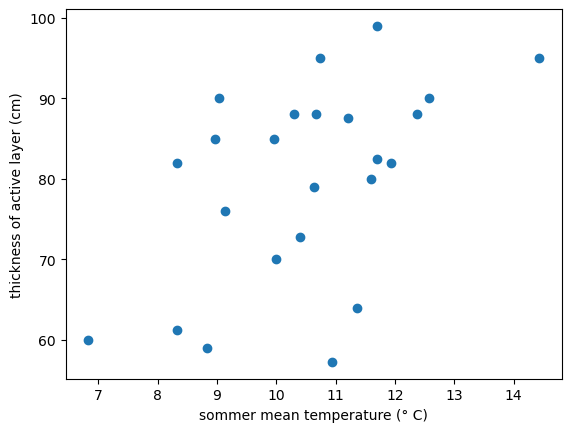

In [78]:
# Gucken wir, wie die Daten von verschiedenen Stationen mit Temperaturdaten korrelieren

i = random.randrange(0, 88)
x_sample = model_data['sommer_mean']
y_sample = model_data[i]
print("Daten für Station", i) #Station


plt.xlabel('sommer mean temperature (°C)')
plt.ylabel('thickness of active layer (cm)')
plt.scatter(x_sample,y_sample)

Bei verschiedene zufälligen Stationen ist die Ergebniss fast immer das gleiche: eine leichte Zusammenhang zwischen die mittleren Sommertemperatur und der Mächtigkeit der aktiven Schicht von Permafrost. Die Streuung ist aber sehr breit. Über diese Korrelation kann man die ähnliche Informationen in verschiedenen Studien finden. So heißt es z.B. in einem Papier des Umweltbundesamtes: <b>"Während die Temperatur des Permafrostes die Langzeitveränderungen der jährlichen mittleren Lufttemperatur widerspiegelt, hängt die Tiefe der aktiven Schicht vor allem von den Sommertemperaturen und deren Amplitude ab."</b> (Url: https://www.umweltbundesamt.de/sites/default/files/medien/357/dokumente/klimagefahr_durch_tauenden_permafrost.pdf). Dabei aus Berechnungen unten kann man sehen, dass die mittlere sommerliche Temperatur hat eine Steigerungstrend.

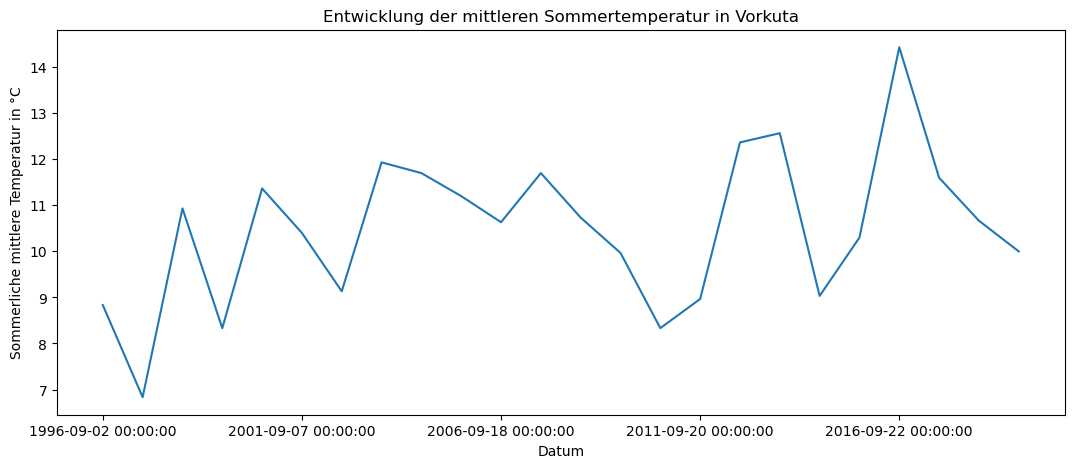

In [86]:
s = pd.Series(model_data["sommer_mean"])

s.plot(figsize=(13, 5), title = "Entwicklung der mittleren Sommertemperatur in Vorkuta")
plt.xlabel('Datum')
plt.ylabel('Sommerliche mittlere Temperatur in °C')

plt.show()

In [89]:
# Wir testen erst, ob die Werte von jede Station normeilverteilt sind
  
for i in range(0, 88):
 stat, p = shapiro(model_data[i])
 print('Statistics=%.3f, p=%.3f' % (stat, p))
# p > 0.05 bedeutet normal distribution

Statistics=0.952, p=0.297
Statistics=0.930, p=0.097
Statistics=0.912, p=0.039
Statistics=0.909, p=0.033
Statistics=0.944, p=0.197
Statistics=0.891, p=0.014
Statistics=0.912, p=0.038
Statistics=0.850, p=0.002
Statistics=0.914, p=0.042
Statistics=0.905, p=0.028
Statistics=0.943, p=0.190
Statistics=0.931, p=0.101
Statistics=0.952, p=0.301
Statistics=0.906, p=0.028
Statistics=0.893, p=0.015
Statistics=0.869, p=0.005
Statistics=0.912, p=0.040
Statistics=0.951, p=0.286
Statistics=0.847, p=0.002
Statistics=0.957, p=0.375
Statistics=0.847, p=0.002
Statistics=0.967, p=0.588
Statistics=0.886, p=0.011
Statistics=0.941, p=0.170
Statistics=0.904, p=0.026
Statistics=0.897, p=0.019
Statistics=0.850, p=0.002
Statistics=0.930, p=0.096
Statistics=0.984, p=0.959
Statistics=0.940, p=0.167
Statistics=0.926, p=0.078
Statistics=0.887, p=0.011
Statistics=0.908, p=0.032
Statistics=0.893, p=0.015
Statistics=0.953, p=0.317
Statistics=0.851, p=0.002
Statistics=0.964, p=0.522
Statistics=0.905, p=0.027
Statistics=0

Leider, stellen die Messungen bei einigen Stationen keine normale Distribution dar. Auf dem Beispiel von ausgewählte Station sehen wir, wo liegt das Problem. Station 7 hat in 2019 enorme große Wert gezeigt. Nach dem entfernen dieser Ausreiße die Kolumn ist mit normalverteilte Daten gefüllt (sehe unten). 

In [94]:
station7 = data_active_layer[7].tolist()
station7.pop() 
stat, p = shapiro(station7)
print(station7)
print('Statistics=%.3f, p=%.3f' % (stat, p))

[52.0, 67.0, 66.5, 65.75, 69.5, 72.75, 75.25, 75.5, 77.25, 79.0, 80.25, 84.0, 84.0, 84.0, 88.0, 87.0, 86.0, 88.0, 86.0, 87.0, 94.0, 78.0, 85.0]
Statistics=0.924, p=0.081


Unsere Idee ist aber alle Werte von allen Stationen transformieren und vereinen. Das ist notwendig für spätere Konstruiren der linearen Regression. 

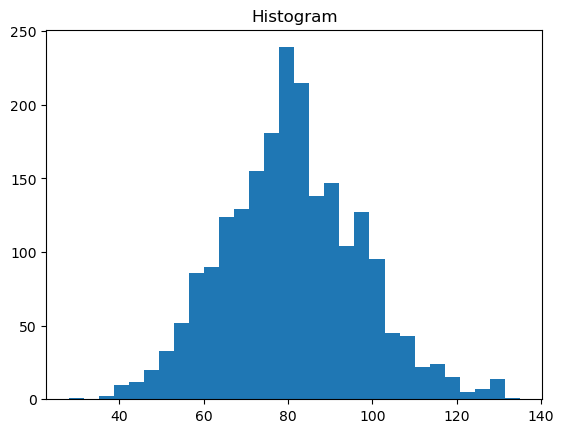

In [99]:
# gesamte Datensatz

all_measures = data_active_layer.iloc[:,].values.flatten(order = 'F') # Nach Order F die Werte werden nach Spalten nacheinander verbunden (Order C ist für Zeilen) 

plt.hist(all_measures, bins=30)  
plt.title("Histogram")
plt.show()

Schon bei nicht-transformierte Werten sieht die Gesamtheit der Stichprobe fast normeilverteit aus. Aber um die Natur die Abhängigkeiten zwischen ALT und Temperatur zu verstehen, sollen die Werte von beide Variablen durch Prozess der Standartisierung durchgehen. 

Wir nutzen die simpleste Methode dafür, wo jeder Wert reichum Spalte nach Spalte durch Formel umberechnet wird:

<i>z = (X – μ) / σ</i>

mit: +
<i>X</i> is a single raw data value
<i>μ</i> ist Mittelwert des Datensatzes
<i>σ</i> ist Standardabweichung (Dormann, Kühn, 2012)
    
Auf Englisch heißt es <i>z-scores</i>. Neue Werte erklären uns, wie weit in Anzahl der Abweichungen ist der ursprungliche Wert von Mittelwert entfernt ist. 

In [106]:
stand_model_data = scipy.stats.zscore(model_data, axis=0)
stand_model_data

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,sommer_mean
1996-09-02 00:00:00,-0.346152,-0.234287,-1.291822,-2.194861,-1.764964,-1.582149,-0.032969,-2.087069,-1.676757,-0.224792,...,-0.247389,-2.431067,-0.638964,-1.388727,-2.695590,0.056781,-1.913337,-2.284704,-1.706122,-1.024055
1997-09-19 00:00:00,-1.720654,-1.792145,-2.023473,-1.761309,-1.681948,-1.668743,-1.703400,-1.004049,-1.525376,-1.194682,...,-2.156881,-1.329051,-2.387012,-1.707479,-1.433880,-1.962116,-1.996038,-1.962039,-1.548860,-2.253947
1998-09-12 00:00:00,-1.154682,-1.646096,-1.675939,-1.176012,-1.578177,-1.582149,-2.296842,-1.040150,-1.525376,-0.770355,...,-1.769015,-1.084159,-1.592445,-1.508259,-1.149996,-1.861171,-1.913337,-1.639374,-1.391599,0.267331
1999-09-11 00:00:00,-1.437668,-1.719121,-1.694230,-1.739631,-1.681948,-1.495554,-1.989131,-1.094301,-1.601067,-0.992622,...,-1.679508,-1.390274,-1.572580,-1.468415,-0.960739,-1.886407,-1.768609,-1.276376,-1.332626,-1.331528
2000-09-02 00:00:00,-0.548285,-1.451364,-1.291822,-1.176012,-1.121587,-1.062583,-1.417668,-0.823546,-1.235229,-0.568295,...,-1.381150,-1.237217,-1.155433,-1.289117,-0.803025,-1.659281,-1.169022,-0.852878,-1.018103,0.533807
2001-09-07 00:00:00,-1.073829,-0.988875,-0.852831,-0.785815,-0.810275,-0.846098,-0.956102,-0.588892,-0.945081,0.058092,...,-1.172299,-0.869878,-0.718421,-0.791068,-0.298342,-0.952667,-0.011199,-0.631045,-0.624950,-0.060640
2002-09-13 00:00:00,0.118753,-0.648093,-0.669918,-0.699104,-0.498963,-0.629612,-0.538494,-0.408389,-0.781085,-0.204586,...,-0.038538,-0.318870,-0.460187,-0.810990,-0.077543,-0.599360,0.112853,-0.731878,-0.507004,-0.839572
2003-09-03 00:00:00,0.421952,-0.721118,-0.505297,-0.460650,-0.270668,-0.564667,-0.384639,-0.390338,-0.629704,0.745098,...,-0.635254,-0.410705,-0.281409,-0.671536,-0.046000,-0.346998,-0.052550,-0.570546,-0.624950,0.882276
2004-09-07 00:00:00,0.563445,-0.477703,-0.194345,-0.330584,-0.166898,-0.499721,-0.274742,-0.263986,-0.503553,-0.588501,...,-0.157881,-0.410705,-0.062903,-0.452395,0.111714,-0.321762,0.092178,-0.368880,-0.507004,0.738789
2005-09-01 00:00:00,0.684724,-0.161263,-0.048015,0.189679,-0.083881,-0.088398,-0.010990,-0.137634,-0.125100,-0.527883,...,-0.515911,-0.288259,0.195331,-0.093799,-0.077543,-0.246053,0.030152,0.276450,0.122041,0.431316


In [109]:
for i in range(0, 88):
 stat, p = shapiro(stand_model_data[i])
 print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.952, p=0.297
Statistics=0.930, p=0.097
Statistics=0.912, p=0.039
Statistics=0.909, p=0.033
Statistics=0.944, p=0.197
Statistics=0.891, p=0.014
Statistics=0.912, p=0.038
Statistics=0.850, p=0.002
Statistics=0.914, p=0.042
Statistics=0.905, p=0.028
Statistics=0.943, p=0.190
Statistics=0.931, p=0.101
Statistics=0.952, p=0.301
Statistics=0.906, p=0.028
Statistics=0.893, p=0.015
Statistics=0.869, p=0.005
Statistics=0.912, p=0.040
Statistics=0.951, p=0.286
Statistics=0.847, p=0.002
Statistics=0.957, p=0.375
Statistics=0.847, p=0.002
Statistics=0.967, p=0.588
Statistics=0.886, p=0.011
Statistics=0.941, p=0.170
Statistics=0.904, p=0.026
Statistics=0.897, p=0.019
Statistics=0.850, p=0.002
Statistics=0.930, p=0.096
Statistics=0.984, p=0.959
Statistics=0.940, p=0.167
Statistics=0.926, p=0.078
Statistics=0.887, p=0.011
Statistics=0.908, p=0.032
Statistics=0.893, p=0.015
Statistics=0.953, p=0.317
Statistics=0.851, p=0.002
Statistics=0.964, p=0.522
Statistics=0.905, p=0.027
Statistics=0

Die Standartisierung hat die Daten normalverteilt nicht gemacht. Als früher gesrieben wurde, für uns ist es wichtig, dass der gesamte Datensatz normalverteilt ist, nicht von jeder Station. Eigentlich wurden die Daten mit erlernene Methode (Min Max Skaling und logistic transformation) verändert, aber sie haben bei Prüfung mit Shapiro-Test nur unwesentlich verbessert. Wegen aufgetretene Probleme mit der Code dieser Art der Transformation der Daten war verlassen.

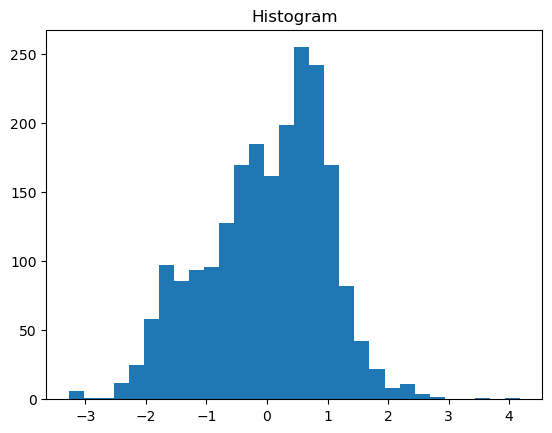

In [116]:
#wir können sehen, dass die transformierte Werte aus ganzem Datensatz fast normeilverteilt sind.
stand_all_measures = stand_model_data.iloc[:,].values.flatten(order = 'F') # Nach Order F die Werte werden nach Spalten nacheinander verbunden (Order C ist für Zeilen) 

plt.hist(stand_all_measures, bins=30)  # 
plt.title("Histogram")
plt.show()

In einer simplen linearen Regression prüfen wir, ob unsere 2 Variablen: mittlere Sommertemperatur aus dem Dataset <i>data_temp</i> als <b><i>predictor variable</i></b> beeinflußt andere Varible active layer thickness (<b><i>response variable</i></b>).

In [119]:
#entfernen sommer_mean, splitting Daten
train_set_al = stand_model_data.drop(columns = "sommer_mean")
stand_train_set = train_set_al.sample(n = 50, axis = 1)
stand_train_set.columns

Index([10, 45,  3, 38, 78,  8, 88, 40, 85, 16, 49,  6, 46, 86, 37,  0, 33, 51,
       52, 41, 53, 84, 75, 67, 54, 12, 31, 20, 36, 57, 65, 63, 74, 43, 13, 50,
       77, 62, 44, 72, 11,  9, 35, 60, 23, 34, 39, 71, 14, 87],
      dtype='object')

In [124]:
stand_test_set = train_set_al.drop(labels = stand_train_set.columns, axis = 1)
stand_test_set.columns

Index([ 1,  2,  4,  5,  7, 15, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 29, 30,
       32, 42, 47, 48, 55, 56, 58, 59, 61, 64, 66, 68, 69, 70, 73, 76, 79, 80,
       81, 82, 83],
      dtype='object')

Weiter wir machen zwei Datasets für Training und Test Data mit Paaren (Standartisierte Wert von active layer thickness und Standartisierte Wert von dazugehörigen mittleren sommerlichen Lufttemperatur). Es ist als bei bestimmte Veränderung der mittleren Temperatur im Sommer folgte bestimmte Veränderung der aktiven Schicht des Permafrostes. 

In [129]:
stand_weather1 = stand_model_data["sommer_mean"].tolist() * 50 #list für trainig set

stand_weather2 = stand_model_data["sommer_mean"].tolist() * 39 #list für test set

In [132]:
stand_train_set2 = pd.DataFrame().assign(TU = stand_weather1, ALT = stand_train_set.iloc[:,].values.flatten(order = "F")) # ALT für active layer thicknes, TU für "Temperaturunterschied"
stand_test_set2 = pd.DataFrame().assign(TU = stand_weather2, ALT = stand_test_set.iloc[:,].values.flatten(order = "F"))

In [135]:
stand_model = LinearRegression()

In [138]:
stand_x_train = np.array(stand_train_set2["TU"]).reshape(-1, 1) #regressor
stand_y_train = np.array(stand_train_set2["ALT"]).reshape(-1, 1) #response

In [141]:
stand_x_test = np.array(stand_test_set2["TU"]).reshape(-1, 1) 
stand_y_test = np.array(stand_test_set2["ALT"]).reshape(-1, 1) 

In [144]:
stand_model.fit(stand_x_train, stand_y_train)

LinearRegression()

In [147]:
stand_r_sq = stand_model.score(stand_x_train, stand_y_train)
print(f"coefficient of determination: {stand_r_sq}")

coefficient of determination: 0.12878587127927177


Ergebnis ist variiert von Auswahl der <i>columns</i>, aber bleibt, leider sehr gering. Darüber wird es noch später in Diskussion geschrieben.  

In [152]:
print(f"intercept: {stand_model.intercept_}")  # b0, oder the intercept

print(f"slope: {stand_model.coef_}")  # b1, oder the slope of the regression model 

intercept: [1.10710412e-16]
slope: [[0.35886748]]


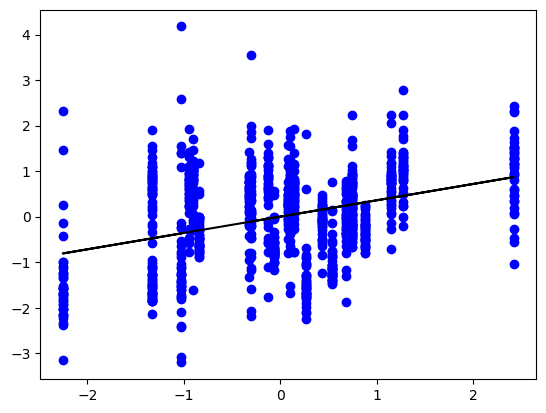

In [155]:
stand_y_pred = stand_model.predict(stand_x_test) # versuch 
plt.scatter(stand_x_test, stand_y_test, color ='b') 
plt.plot(stand_x_test, stand_y_pred, color ='k') 
  
plt.show() 

In [164]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=stand_y_test,y_pred=stand_y_pred) 
mse_test = mean_squared_error(y_true=stand_y_test,y_pred=stand_y_pred)  
rmse = mean_squared_error(y_true=stand_y_test,y_pred=stand_y_pred,squared=False) 
  
print("MAE:",mae) 
print("MSE:",mse_test)
print("RMSE:",rmse)

MAE: 0.7704249167058672
MSE: 0.8987117069784708
RMSE: 0.948004064853348


Sieht nicht so gut aus. Probieren gleichen Vorgang mit nicht-transformierte Daten ist auch versuchswert, weil Funktion <i>LinearRegression()</i> die Werte normalisiert auch (nicht klar inwieweit). Oben geschriebene Code für Splitting des Datensatzes habe ich oben gelassen, weil so den Ablauf der Prozesse besser verfolgt, man kann aber elegantere Lösung verwenden (aus Kurs).

In [174]:
weather3 = model_data["sommer_mean"].tolist() * 89 #column of regressor

In [178]:
model_data2 = model_data.drop(columns = "sommer_mean")
model_data3 = pd.DataFrame().assign(TU = weather3, ALT = model_data2.iloc[:,].values.flatten(order = "F")) # ALT f active layer th, TU f temperaturunterschied

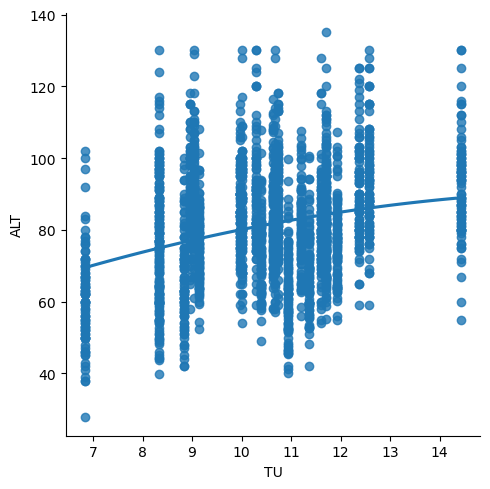

In [183]:
sns.lmplot(x ="TU", y ="ALT", data = model_data3, order = 2, ci = None) 
plt.show()

In [188]:
x = model_data3["TU"].values
y = model_data3["ALT"].values

In [191]:
xx = x.reshape((-1,1))

In [195]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(xx,y, test_size = 0.3, random_state =  0)

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [198]:
y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

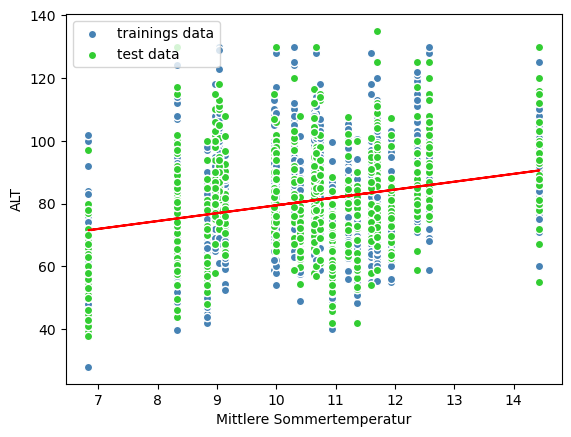

In [201]:
plt.scatter(x_train,y_train,c='steelblue', edgecolor = 'white',label = 'trainings data')
plt.scatter(x_test,y_test,c='limegreen', edgecolor = 'white', label = 'test data')
plt.legend(loc = 'upper left')
plt.xlabel('Mittlere Sommertemperatur')
plt.ylabel('ALT')

# linear regression line: 
plt.plot(x_train,y_train_predict, color = 'red')

In [205]:
print('MSE train:', mean_squared_error(y_train,y_train_predict))
print('MSE test:', mean_squared_error(y_test,y_test_predict))

MSE train: 233.274513208294
MSE test: 271.17988915468123


### Diskussion

Mit dem Koeffizienten von Determination 0.12 kann man einschätzen, dass die Model passt nicht und unsere Hypothese über Korrelation zwischen der sommerlichen Temperatur und Mächtigkeit der Auftauschicht nicht bestätigt. Im Gegenteil dazu in mehreren Studien dieser Zusammenhang war bestätigt (sogar mit gleichen, aber nichtvollständigen Daten: Mazhitova, Kaverin, 2007). Natürlich, spielen in Prozessen andere wichtige Faktoren, wie, zum Beispiel, die Vegetation, Relief, Eigenschaften des Sediments und der Boden 

Als die erste mögliche Ursache kann man die <b>unbefriedigende Aufbereitung</b> der Daten genannt werden. Sie erhalten viele Ausreiße (sehr kleinere und sehr hohe Werte, die im Vergleich mit Daten aus anderen Stationen in gleiche Periode enorm verändert). Dabei sind die Mächtigkeit (cm) und Temperatur ganz verschiedene Größen. Somit stellt sich die Frage nach <b>der Art der ausgewählten Transformation</b> des Datensatzes. Für weitere Entwicklung der Frage wäre es sinnvoller, nach meiner Meinung, entnehmen erste Periode, auf Basis von denen rechnen für jede Station einen Mittelwert, und danach umrechnen alle Werte per Station als Prozentsatz zu diesem Mittelwert mit folgender Transformation beide Variablen.

Es ist nicht auszuschließen, dass die Situation im <b>Untersuchungsgebiet</b> etwas spezifisch ist, so spielt das Temperaturregime im Vergleich zu anderen Parametern eine geringe Rolle.

Es gibt die Methoden das Model mehr anzupassen. In diesem Fall, wenn die Transformation der Werte fragwürdig ist, diese Methoden wurden nicht angewendet.


### Quellen

* Dormann, Carsten F., Kühn, Ingolf. Angewandte Statistik für die biologischen Wissenschaften. 2. Auflage. Helmholtz Zentrum für Umweltforschung-UFZ, 13.November 2012. Abgerufen von https://www.biom.uni-freiburg.de/Dateien/PDF/dormann-kuehn_angewandtestatistik.pdf
* GTN-P 2016. Global Terrestrial Network for Permafrost Database: Active Layer Thickness Data (CALM - Circumpolar Active Layer Monitoring). Akureyri, Iceland. ISSN 2410-2385.
* Kaverin, Dmitry, Galina Malkova, Dmitry Zamolodchikov, Nikolay Shiklomanov, Alexander Pastukhov, Alexander Novakovskiy, Marat Sadurtdinov, Andry Skvortsov, Andry Tsarev, Alexander Pochikalov, Sergei Malitsky, and Gleb Kraev. n.d. “Long-Term Active Layer Monitoring at CALM Sites in the Russian European North.”
* Liljedahl, Anna, Julia Boike, Ronald Daanen, Alexander Fedorov, Gerald Frost, Guido Grosse, Larry Hinzman, Yoshihiro Iijima, Janet Jorgenson, Nadya Matveyeva, Marius Necsoiu, Martha Raynolds, Vladimir Romanovsky, Jörg Schulla, Ken Tape, Donald Walker, Cathy Wilson, Hironori Yabuki, and Donatella Zona. 2016. “Pan-Arctic Ice-Wedge Degradation in Warming Permafrost and Its Influence on Tundra Hydrology.” Nature Geoscience 9. doi: 10.1038/ngeo2674.
* Linear Models. Abgerufen 14. August 2024 von https://scikit-learn.org/stable/modules/linear_model.html
* Linear Regression in Python. Abgerufen 14. August 2024 von https://realpython.com/linear-regression-in-python/
* Mazhitova, G. G., and Dmitry Kaverin. 2007. “Thaw Depth Dynamics and Soil Surface Subsidence at a Circumpolar Active Layer Monitoring (CALM) Site, the European North of Russia.” Earth’s Cryosphere 11:20–30.
* Melnikov, E. S.; Leibman, M. O.; Moskalenko, N. G.; Vasiliev, A. A. . (2004). Active-Layer Monitoring in the Cryolithozone Of West Siberia. Polar Geography, 28(4), 267–285. doi:10.1080/789610206
* Pogoda i Klimat. Abgerufen 7. August 2024, von http://www.pogodaiklimat.ru/history/23226.htm
* Python | Linear Regression using sklearn. Abgerufen 14. August 2024 von https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/
* Rudolph, A., Krois, J., Hartmann, K. (2023): Statistics and Geodata Analysis using Python (SOGA-Py). Department of Earth Sciences, Freie Universitaet Berlin
* Umweltbundesamt. Klimagefahr durch tauenden Permafrost? Hintergrundpapier. Dessau, August 2006. Abgerufen von https://www.umweltbundesamt.de/sites/default/files/medien/357/dokumente/klimagefahr_durch_tauenden_permafrost.pdf
* U.S. Arctic Research Commission Permafrost Task Force (2003) Climate Change, Permafrost, and Impacts on Civil Infrastructure. Special Report 01-03, U.S. Arctic Research Commission, Arlington, Virginia. Abgerufen von https://www.arctic.gov/uploads/assets/permafrost.pdf
